In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from frbpoppy import unpickle, merge_pop
from frbpoppy.tns import get_chimefrb_catalog1

import warnings
warnings.filterwarnings('ignore')

## Loading catalog

In [2]:
chime_catlog_1 = get_chimefrb_catalog1(repeater=False)

## Loading populations

In [3]:
for model in ['pl', 'sfr', 'delay_0.1gyr', 'delay_0.5gyr', 'delay_1gyr']:
    for i in range(50):
        exec("surv_pop_%s_%s=unpickle('mcmc/surveyed_' + model + '_' + str(i))"%(model.replace('.', ''),i))
for model in ['pl', 'sfr', 'delay_01gyr', 'delay_05gyr', 'delay_1gyr']:
    exec("surv_pop_%s=merge_pop(*[eval('surv_pop_' + model + '_' + str(i)) for i in range(50)])"%model)

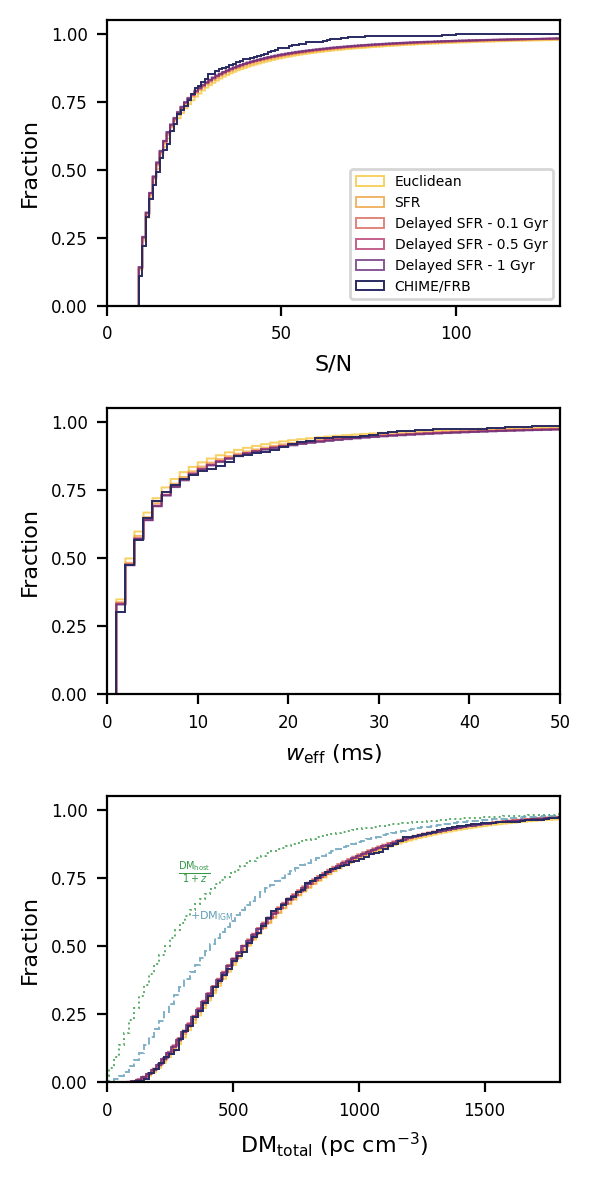

In [32]:
fig = plt.figure(figsize=(3,6), dpi=200)

ax1 = plt.subplot2grid((3,1),(0,0), rowspan=1)
plt.hist(surv_pop_pl.frbs.snr, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_pl.frbs.snr)-9), linewidth=0.7, label='Euclidean', color='#F6C63C')
plt.hist(surv_pop_sfr.frbs.snr, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_sfr.frbs.snr)-9), linewidth=0.7, label='SFR', color='#EFA143')
plt.hist(surv_pop_delay_01gyr.frbs.snr, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_01gyr.frbs.snr)-9), linewidth=0.7, label='Delayed SFR - 0.1 Gyr', color='#D96558')
plt.hist(surv_pop_delay_05gyr.frbs.snr, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_05gyr.frbs.snr)-9), linewidth=0.7, label='Delayed SFR - 0.5 Gyr', color='#B43970')
plt.hist(surv_pop_delay_1gyr.frbs.snr, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_1gyr.frbs.snr)-9), linewidth=0.7, label='Delayed SFR - 1 Gyr', color='#692F7C')
plt.hist(chime_catlog_1.snr, histtype='step', cumulative=True, density=True, alpha=1, color='#282A62', \
         bins=int(max(chime_catlog_1.snr)-9), linewidth=0.7, label='CHIME/FRB')
plt.xlim(0, 130)
plt.xlabel('S/N', fontsize=8)
plt.ylabel('Fraction', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(fontsize=5, loc='lower right')

ax2 = plt.subplot2grid((3,1),(1,0), rowspan=1)
plt.hist(np.round(surv_pop_pl.frbs.w_eff / 0.983) * 0.983, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_pl.frbs.w_eff)), linewidth=0.7, label='PL', color='#F6C63C')
plt.hist(np.round(surv_pop_sfr.frbs.w_eff / 0.983) * 0.983, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_sfr.frbs.w_eff)), linewidth=0.7, label='SFR', color='#EFA143')
plt.hist(np.round(surv_pop_delay_01gyr.frbs.w_eff / 0.983) * 0.983, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_01gyr.frbs.w_eff)), linewidth=0.7, label='Delayed SFR - 0.1 Gyr', color='#D96558')
plt.hist(np.round(surv_pop_delay_05gyr.frbs.w_eff / 0.983) * 0.983, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_05gyr.frbs.w_eff)), linewidth=0.7, label='Delayed SFR - 0.5 Gyr', color='#B43970')
plt.hist(np.round(surv_pop_delay_1gyr.frbs.w_eff / 0.983) * 0.983, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_1gyr.frbs.w_eff)), linewidth=0.7, label='Delayed SFR - 1 Gyr', color='#692F7C')
plt.hist(np.round(chime_catlog_1.w_eff / 0.983) * 0.983, histtype='step', cumulative=True, density=True, \
         bins=int(max(chime_catlog_1.w_eff)), alpha=1, color='#282A62', linewidth=0.7, label='CHIME/FRB')
plt.xlim(0, 50)
plt.xlabel('$w_\mathrm{eff}$ (ms)', fontsize=8)
plt.ylabel('Fraction', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
#plt.legend(fontsize=5, loc='lower right')
#plt.text(39, 0.1, '$p_\mathrm{KS}$ = ' + str(format(w_gof, '.3f')))

ax3 = plt.subplot2grid((3,1),(2,0), rowspan=1)
plt.hist(surv_pop_pl.frbs.dm, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_pl.frbs.dm)/20), linewidth=0.7, label='PL', color='#F6C63C')
plt.hist(surv_pop_sfr.frbs.dm, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_sfr.frbs.dm)/20), linewidth=0.7, label='SFR', color='#EFA143')
plt.hist(surv_pop_delay_01gyr.frbs.dm, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_01gyr.frbs.dm)/20), linewidth=0.7, label='Delayed SFR - 0.1 Gyr', color='#D96558')
plt.hist(surv_pop_delay_05gyr.frbs.dm, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_05gyr.frbs.dm)/20), linewidth=0.7, label='Delayed SFR - 0.5 Gyr', color='#B43970')
plt.hist(surv_pop_delay_1gyr.frbs.dm, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_1gyr.frbs.dm)/20), linewidth=0.7, label='Delayed SFR - 1 Gyr', color='#692F7C')
plt.hist(chime_catlog_1.dm, histtype='step', cumulative=True, density=True, alpha=1, color='#282A62', \
         bins=int(max(chime_catlog_1.dm)/20), linewidth=0.7, label='CHIME/FRB')
plt.hist(surv_pop_delay_1gyr.frbs.dm_host-40, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_1gyr.frbs.dm_host-40)/20), linewidth=0.7, linestyle='dotted', color='#329845')
plt.hist(surv_pop_delay_1gyr.frbs.dm-40-surv_pop_delay_1gyr.frbs.dm_mw, histtype='step', cumulative=True, density=True, alpha=0.8, \
         bins=int(max(surv_pop_delay_1gyr.frbs.dm-40-surv_pop_delay_1gyr.frbs.dm_mw)/20), linewidth=0.7, linestyle='dashed', color='#619DB8')
plt.xlim(0, 1800)
plt.xlabel('DM$_\mathrm{total}$ (pc cm$^{-3}$)', fontsize=8)
plt.ylabel('Fraction', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
#plt.legend(fontsize=5, loc='lower right')
plt.text(280, 0.75, '$\\frac{\mathrm{DM}_\mathrm{host}}{1+z}$', fontsize=5, color='#329845')
#plt.arrow(100, 0.75, 110, -0.09, linewidth=0.1)
plt.text(330, 0.6, '+$\mathrm{DM}_\mathrm{IGM}}$', fontsize=4, color='#619DB8')
#plt.arrow(390, 0.6, -100, 0.08, linewidth=0.1)
plt.tight_layout()
plt.savefig('best_fitting_CDF.pdf', bbox_inches='tight', transparent=True)
plt.show()